# Case

In [2]:
import os

%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

results_dir = 'results' 
nbasis_tensors = 4 
tinit  = 0
tfinal = 10000

ndata = 100

## Load Data

In [3]:
# cost & weights
J = []

for i in range(tfinal+1):
    iJ = np.loadtxt(os.path.join(results_dir, f'J.{i}'))
    J.append(iJ.tolist())

# initial
g_0 = np.squeeze(np.loadtxt(os.path.join(results_dir, f'g.{tinit}')) )
if g_0.ndim==1:
    g_0 = np.expand_dims(g_0, 1)
W_0 = np.loadtxt(os.path.join(results_dir, f'w.{tinit}'))
    
# final
g_1 = np.squeeze(np.loadtxt(os.path.join(results_dir, f'g.{tfinal}')) )
if g_1.ndim==1:
    g_1 = np.expand_dims(g_1, 1)
W_1 = np.loadtxt(os.path.join(results_dir, f'w.{tfinal}'))
nweights = W_1.shape[0]

# truth
g_t = np.loadtxt(os.path.join(results_dir, 'g_truth'))

# y
y = np.loadtxt(os.path.join(results_dir, 'theta_input'))


In [4]:

mesh_shape = [ndata, ndata]

def rs(x):
    return x.reshape(mesh_shape)


def get_lim(x):
    return np.max(np.abs(x))


def plot_comp(y, z, val, col_names, row_names, cmap='coolwarm', contour=False, lim_option='same_sym'):
    Nrows = len(row_names)
    Ncols = len(col_names)
    lim = []
    for i in range(Nrows):
        if lim_option=='same_sym':
            lim.append(get_lim(val[-1][:, i]))
        elif lim_option=='same_minmax':
            lim.append((np.min(val[-1][:, i]), np.max(val[-1][:, i])))
    fig, axs = plt.subplots(Nrows, Ncols, figsize=(10, 15))
    for irow in range (Nrows):
        for icol in range(Ncols): 
            if contour:
                if lim_option=='same_sym':
                    cs = axs[irow, icol].contourf(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap, vmin=-lim[irow], vmax=lim[irow])
                elif lim_option=='same_minmax':
                    cs = axs[irow, icol].contourf(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap, vmin=lim[irow][0], vmax=lim[irow][1])
                elif lim_option=='different': 
                    cs = axs[irow, icol].contourf(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap)
                    cbar = fig.colorbar(cs, ax=axs[irow, icol], shrink=0.95)
            else:
                if lim_option=='same_sym':
                    cs = axs[irow,icol].pcolor(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap, vmin=-lim[irow], vmax=lim[irow])
                elif lim_option=='same_minmax':
                    cs = axs[irow,icol].pcolor(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap, vmin=lim[irow][0], vmax=lim[irow][1])
                elif lim_option=='different': 
                    cs = axs[irow,icol].pcolor(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap)
                    cbar = fig.colorbar(cs, ax=axs[irow, icol], shrink=0.95)
            axs[irow,icol].tick_params(axis='both', which='both', length=0)
            if icol==0:
                axs[irow,icol].set_ylabel(row_names[irow])
            if irow==0:
                axs[irow,icol].set_title(col_names[icol])
            axs[irow, icol].set_aspect('equal', 'box')
        if not contour and (lim_option=='same_sym' or lim_option=='same_minmax'):
            cbar = fig.colorbar(cs, ax=axs[irow,:].ravel().tolist(), shrink=0.95)
    return fig, axs

# Results

## Cost

<IPython.core.display.Javascript object>


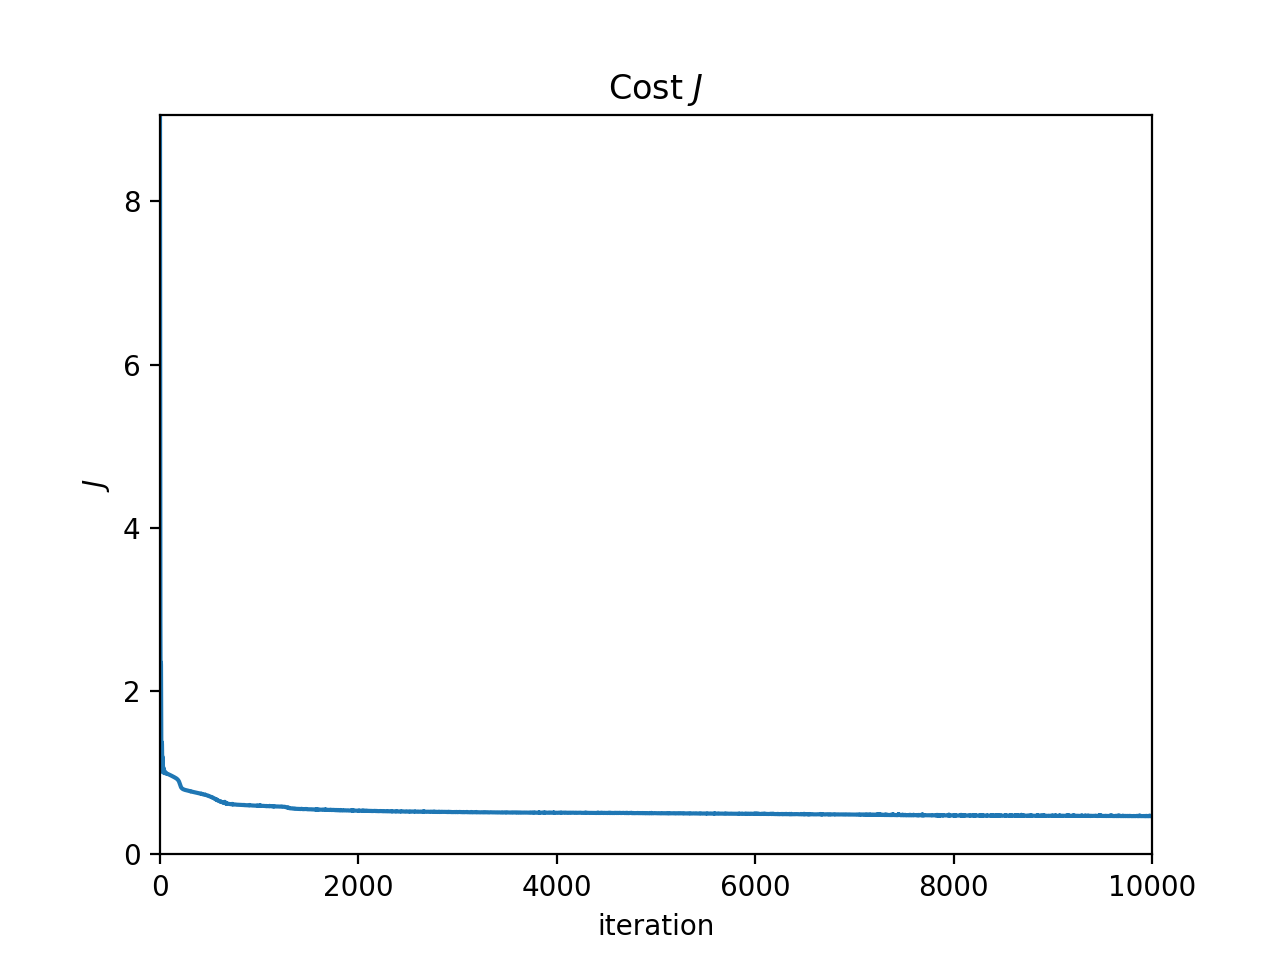

<IPython.core.display.Javascript object>


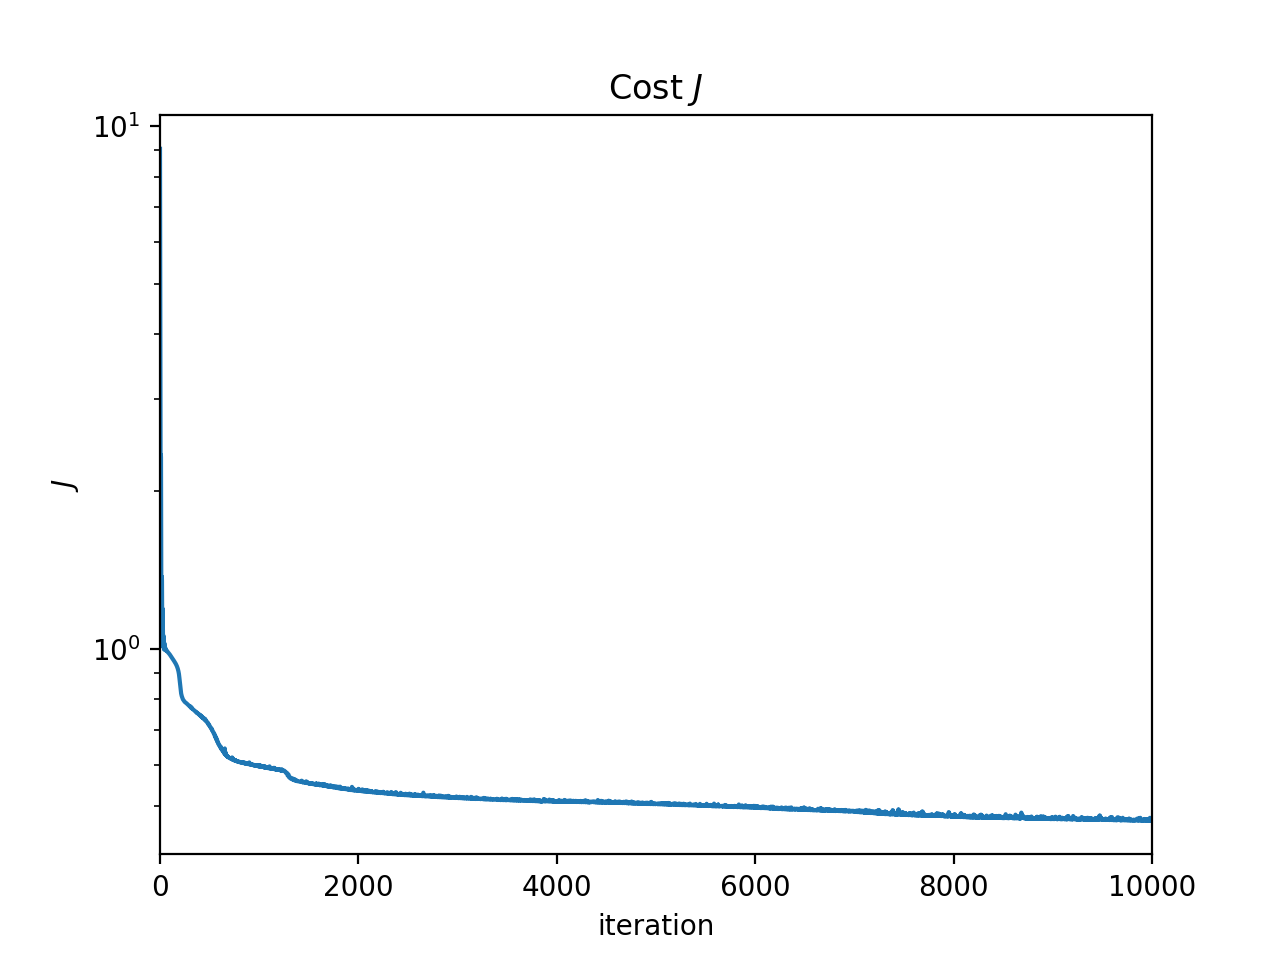

(0.0, 10000.0)

In [5]:
fig, ax = plt.subplots()
ax.plot(J[:tfinal+1], '-')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$J$')
ax.set_title(r'Cost $J$')
ax.set_ylim(0., np.max(J[:tfinal+1]))
ax.set_xlim(0., tfinal)
    
fig, ax = plt.subplots()
ax.semilogy(J[:tfinal+1], '-')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$J$')
ax.set_title(r'Cost $J$')
ax.set_xlim(0., tfinal)


## Weights (initial and final values)

<IPython.core.display.Javascript object>


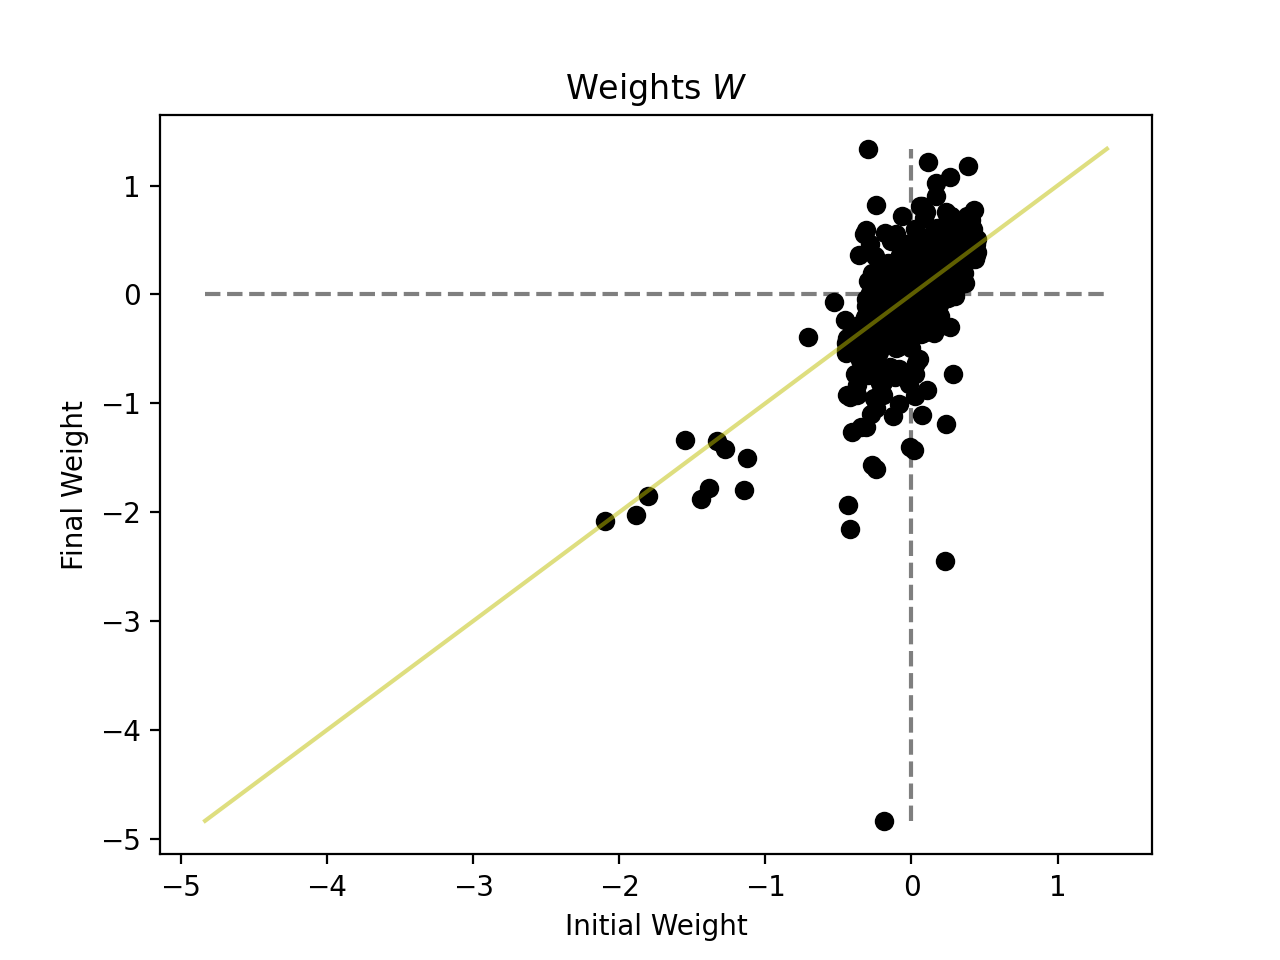

In [6]:
plt.figure()
plt.title(r'Weights $W$')
plt.xlabel(r'Initial Weight')
plt.ylabel(r'Final Weight')

line = [min(np.min(W_0), np.min(W_1)), max(np.max(W_0), np.max(W_1))]
plt.plot(line, [0., 0.], 'k--', alpha=0.5)
plt.plot([0., 0.], line, 'k--', alpha=0.5)

plt.plot(W_0, W_1, 'ko')
plt.plot(line, line, 'y-', alpha=0.5)


## Functions $g^{(i)}$

<IPython.core.display.Javascript object>


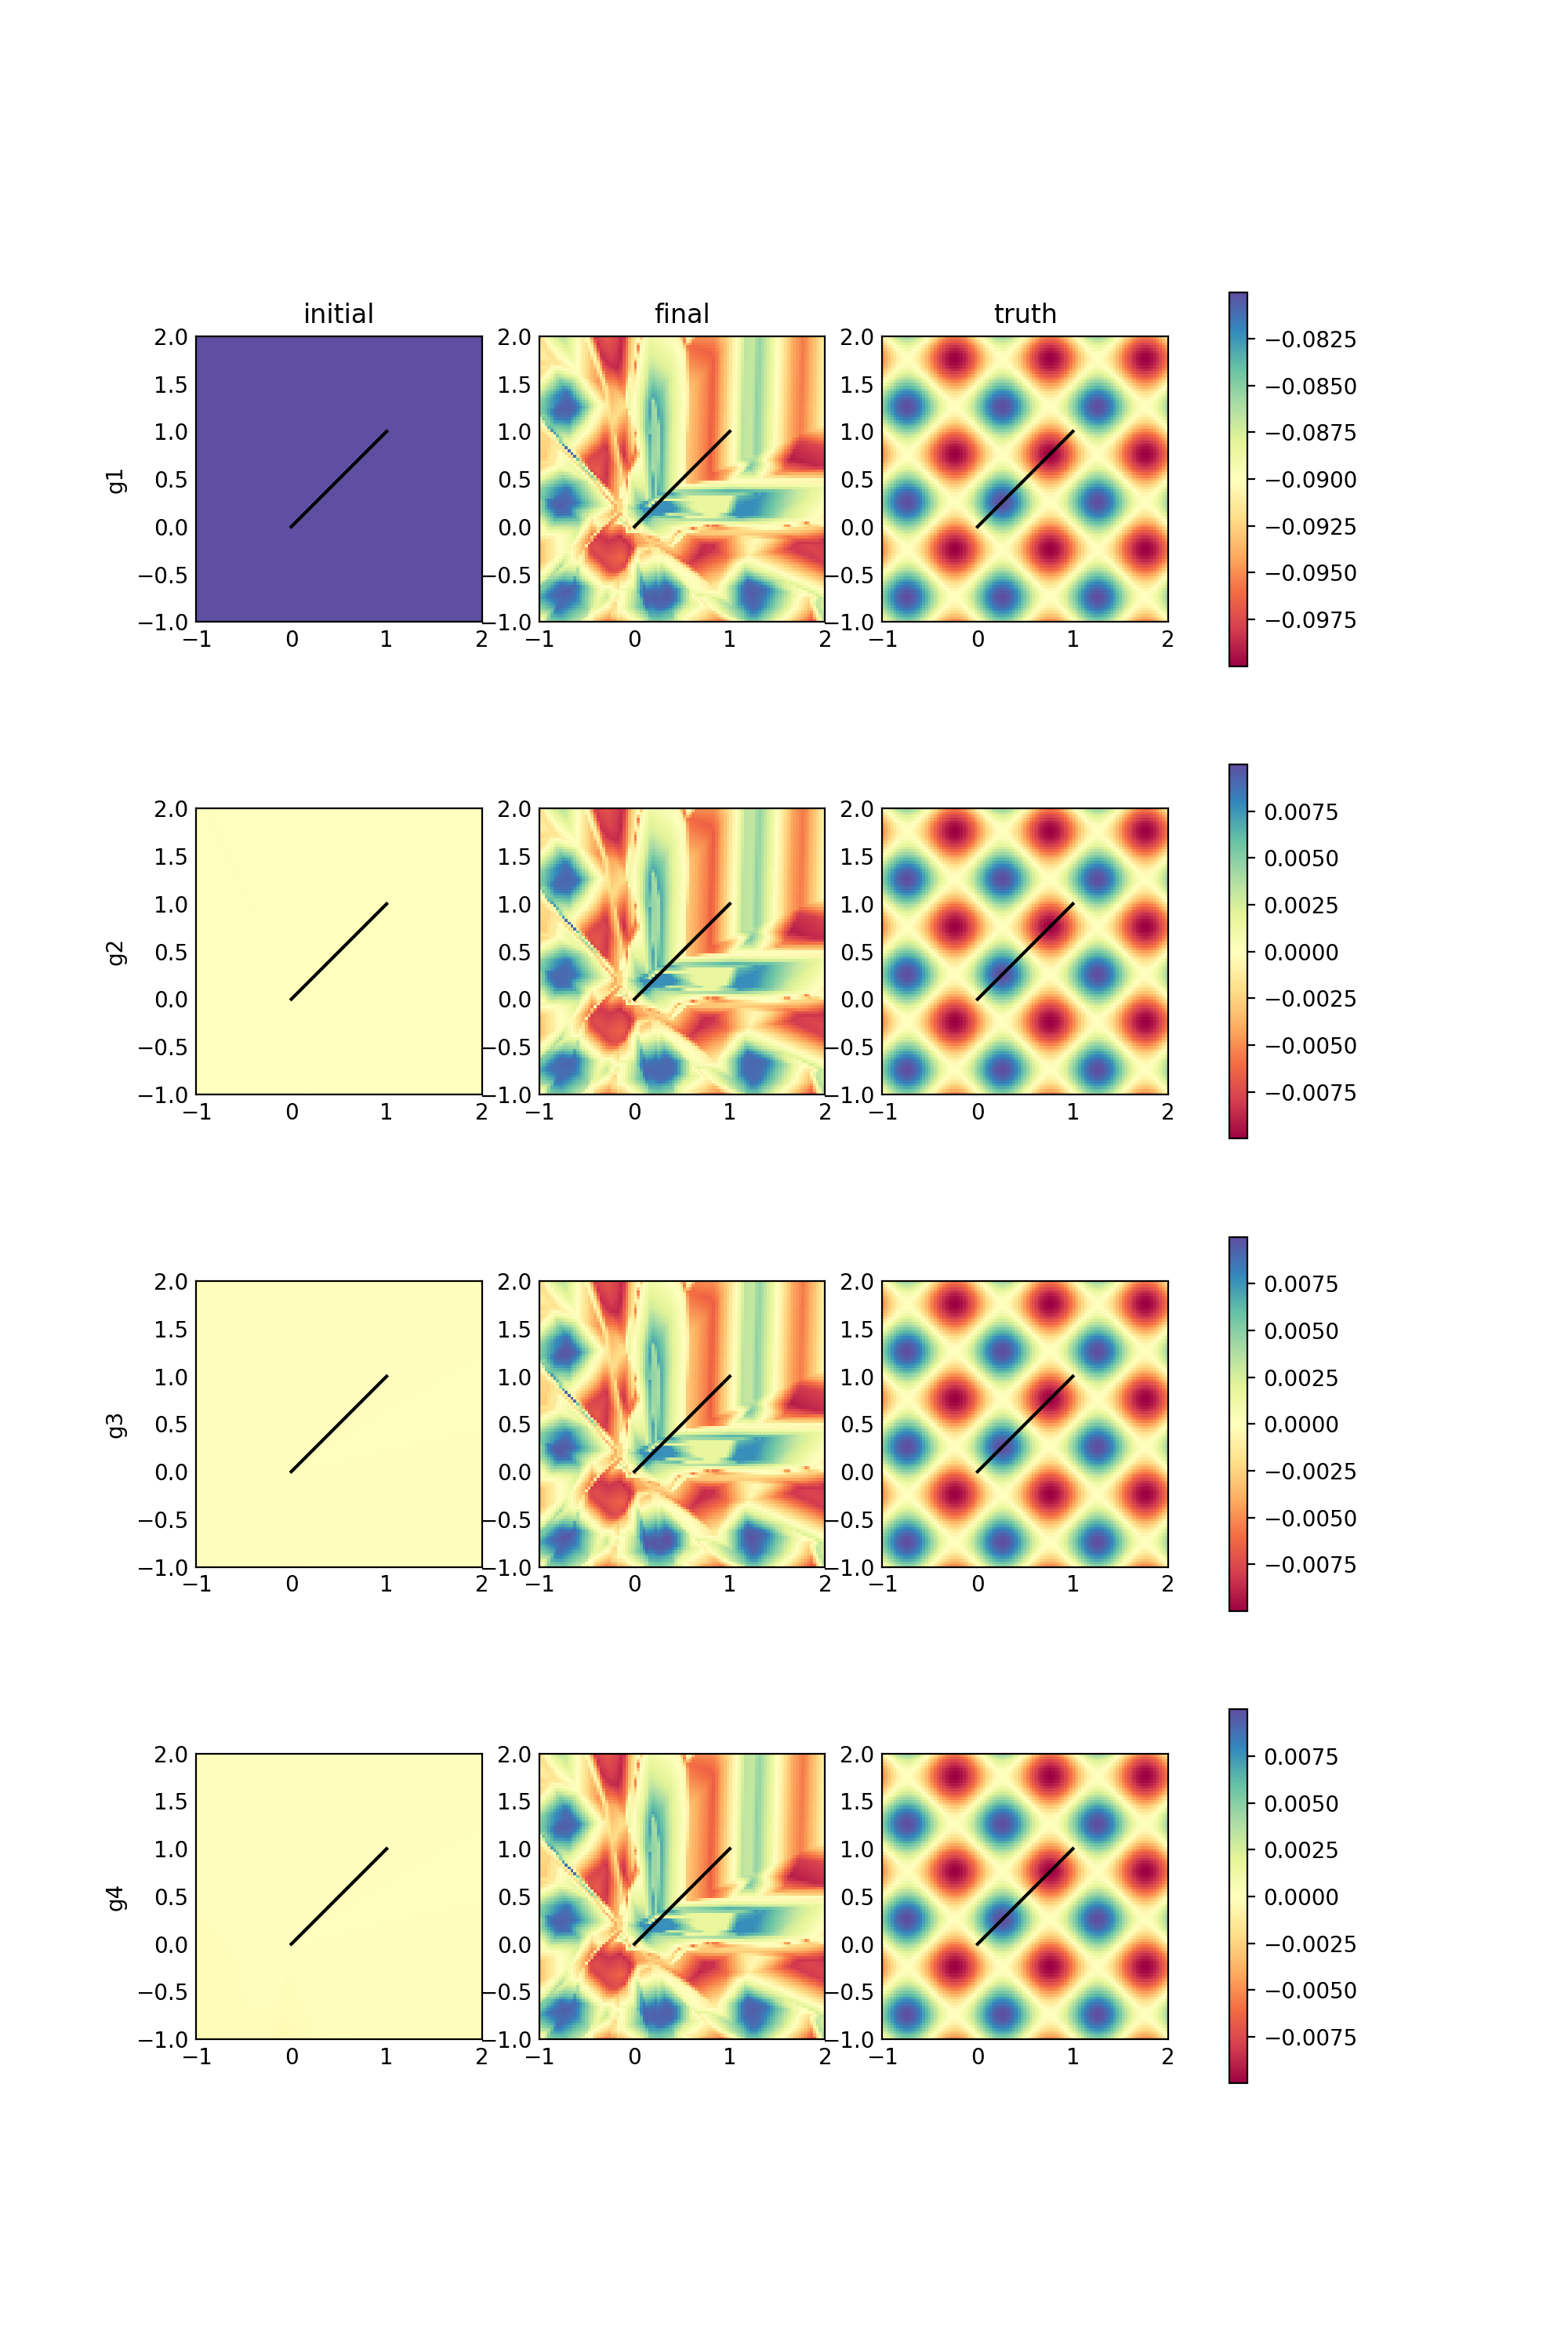

<ipython-input-4-13c436103c91>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = axs[irow,icol].pcolor(rs(y), rs(z), rs(val[icol][:,irow]), cmap=cmap, vmin=lim[irow][0], vmax=lim[irow][1])


In [7]:
N = 100
theta_1 = y[:, 0]
theta_2 = y[:, 1]
val = [g_0, g_1, g_t]
col_names = ['initial', 'final', 'truth']
row_names = ['g1', 'g2', 'g3', 'g4']

fig, axs = plot_comp(theta_1, theta_2, val, col_names, row_names, cmap='Spectral', contour=False, lim_option='same_minmax') 
for ax in axs.ravel().tolist():
    ax.plot([0.0, 1.0], [0.0, 1.0], 'k-')